In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib_inline.backend_inline

matplotlib_inline.backend_inline.set_matplotlib_formats("png2x") # svg, retina, png2x ...
mpl.style.use("seaborn-v0_8")
mpl.rcParams.update({"figure.constrained_layout.use": True})
sns.set_context("paper") 
sns.set_palette("Set2") 
sns.set_style("whitegrid") 

plt.rc("font", family = "serif")
plt.rcParams["axes.unicode_minus"] = False

In [2]:
# 기본 작업 경로 설정
import os
notebook_path = os.path.abspath("../readme.md")
notebook_dir = os.path.dirname(notebook_path)
os.chdir(notebook_dir)

# 현재 작업 디렉토리 출력
print("Current working directory: ", os.getcwd())

Current working directory:  /mnt/e/py_data/project_3_git


In [3]:
import json
import pandas as pd
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

with open("models/faster_rcnn_R_50_FPN_3x/metrics.json", "r") as f:
    data = json.load(f)

In [4]:
validated_data = []
for i in data:
    if 'bbox/AP' in i.keys():
        validated_data.append(i)
        
training_follow = []
for i in data:
    if 'bbox/AP' not in i.keys():
        training_follow.append(i)

In [5]:
valid_df = pd.DataFrame(validated_data)
train_df = pd.DataFrame(training_follow)


In [6]:
same_cols =[]
for i in  valid_df.columns:
    if i in train_df.columns:
        same_cols.append(i)

In [7]:
valid_df.columns

Index(['bbox/AP', 'bbox/AP-angry', 'bbox/AP-happy', 'bbox/AP-sad',
       'bbox/AP-surprised', 'bbox/AP50', 'bbox/AP75', 'bbox/APl', 'bbox/APm',
       'bbox/APs', 'iteration', 'data_time', 'eta_seconds',
       'fast_rcnn/cls_accuracy', 'fast_rcnn/false_negative',
       'fast_rcnn/fg_cls_accuracy', 'loss_box_reg', 'loss_cls', 'loss_rpn_cls',
       'loss_rpn_loc', 'lr', 'rank_data_time', 'roi_head/num_bg_samples',
       'roi_head/num_fg_samples', 'rpn/num_neg_anchors', 'rpn/num_pos_anchors',
       'time', 'total_loss'],
      dtype='object')

In [8]:
# epoch 계산 , 배치 사이즈 16, 총 6000개의 데이터

valid_df["epoch"] = valid_df["iteration"] / (6000 / 16)

In [9]:
# valid 와 train 그래프 그리기
valid_df[same_cols]
train_df[same_cols]

,iteration,data_time,eta_seconds,fast_rcnn/cls_accuracy,fast_rcnn/false_negative,fast_rcnn/fg_cls_accuracy,loss_box_reg,loss_cls,loss_rpn_cls,loss_rpn_loc,lr,rank_data_time,roi_head/num_bg_samples,roi_head/num_fg_samples,rpn/num_neg_anchors,rpn/num_pos_anchors,time,total_loss
0,19,1.507732,2.376783e+03,0.026611,0.000000,0.229569,0.140432,1.826683,0.089219,0.009855,1.996200e-05,1.507732,122.25000,5.75000,251.84375,4.15625,2.425288,2.064307
1,39,1.414048,2.269519e+03,0.777832,0.484948,0.077524,0.164604,1.298087,0.084145,0.009699,3.992200e-05,1.414048,121.62500,6.37500,251.87500,4.12500,2.329534,1.593831
2,59,1.460711,2.222238e+03,0.926025,1.000000,0.000000,0.244213,0.624799,0.064008,0.010277,5.988200e-05,1.460711,118.71875,9.28125,251.84375,4.15625,2.364212,0.949976
3,79,1.632538,2.214723e+03,0.896240,1.000000,0.000000,0.379014,0.411190,0.039440,0.009045,7.984200e-05,1.632538,114.71875,13.28125,251.84375,4.15625,2.554143,0.837653
4,99,1.504071,2.178025e+03,0.890137,1.000000,0.000000,0.402840,0.355324,0.023066,0.009188,9.980200e-05,1.504071,113.93750,14.06250,252.06250,3.93750,2.471827,0.788911
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1175,23959,1.436508,1.281540e+06,0.993408,0.009059,0.987437,0.094726,0.019239,0.000034,0.001297,9.960711e-04,1.436508,103.28125,24.71875,251.81250,4.18750,2.276952,0.113987
1176,23979,1.414722,1.283091e+06,0.993164,0.009051,0.990949,0.088956,0.018498,0.000050,0.001141,9.960646e-04,1.414722,103.87500,24.12500,252.18750,3.81250,2.285976,0.107859
1177,24018,1.546620,NaN,0.993652,0.007673,0.992195,0.090154,0.017057,0.000044,0.001202,9.960518e-04,1.546620,103.68750,24.31250,251.84375,4.15625,2.421181,0.108105
1178,24019,NaN,1.283894e+06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


/tmp/ipykernel_29927/1183008768.py:33: UserWarning: This figure was using a layout engine that is incompatible with subplots_adjust and/or tight_layout; not calling subplots_adjust.
  plt.subplots_adjust(hspace=20, wspace=20)  # Adjust horizontal and vertical space
/tmp/ipykernel_29927/1183008768.py:37: UserWarning: The figure layout has changed to tight
  fig.tight_layout()


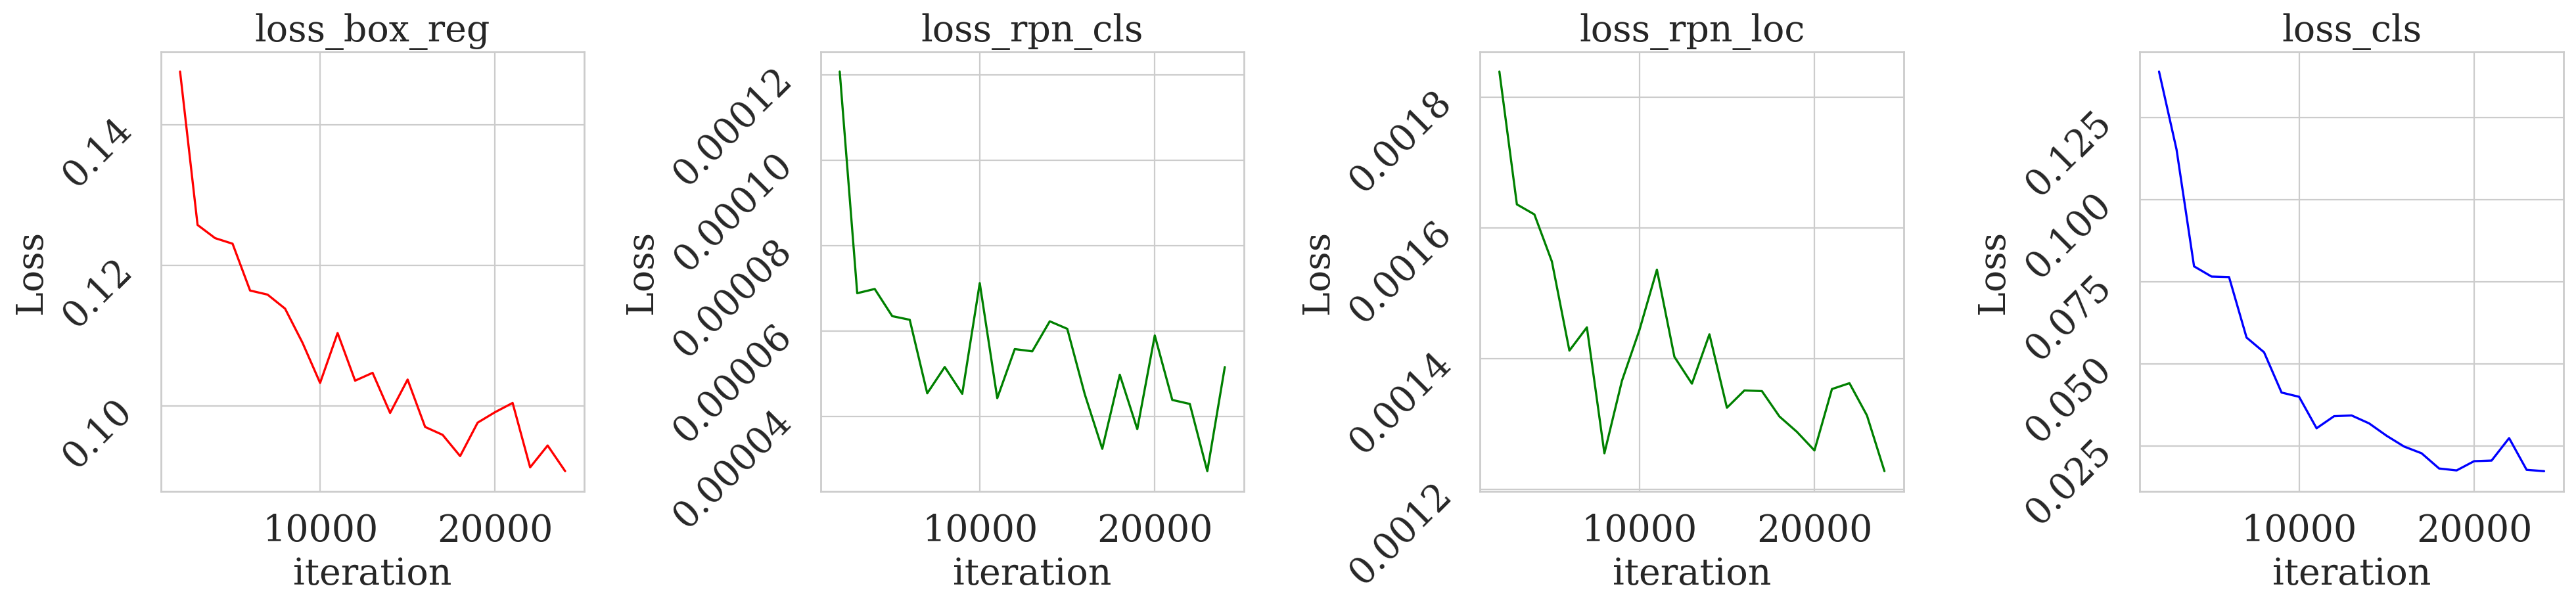

In [10]:
# 상자 loss graph
# colums = ['loss_box_reg','loss_rpn_cls' ,'loss_rpn_loc']
# loss_box_reg: 박스 회귀 손실 (Box Regression Loss)
#   모델이 예측한 박스와 실제 박스 간의 차이를 측정
# loss_rpn_cls: RPN (Region Proposal Network)에서의 클래스 손실
#   RPN이 제안한 지역의 클래스 예측 오류를 측정
#   이 손실은 박스 위치와 관련이 있다.
#   특히 RPN이 제안한 박스의 정확성을 평가하는 데 사용
# loss_rpn_loc: RPN에서의 위치 손실
#   제안한 지역의 위치와 실제 위치 간의 차이를 측정
#   이 손실은 박스의 정확한 위치를 예측하는 데 중요
import matplotlib.ticker as ticker

# Set global font size to 20
plt.rc('font', size=20)  # Controls default text sizes
plt.rc('axes', titlesize=20)  # Fontsize of the title
plt.rc('axes', labelsize=20)  # Fontsize of the x and y labels
plt.rc('xtick', labelsize=20)  # Fontsize of the x tick labels
plt.rc('ytick', labelsize=20)  # Fontsize of the y tick labels
plt.rc('legend', fontsize=20)  # Fontsize of the legend
plt.rc('figure', titlesize=20)  # Fontsize of the figure title

fig, ax = plt.subplots(1, 4, figsize=(20, 5))
ax.flatten()
for i, p, c in zip(['loss_box_reg','loss_rpn_cls', 'loss_rpn_loc', 'loss_cls'], ax, ['r', 'g', 'g', 'b']):
    sns.lineplot(data=valid_df[same_cols], x='iteration', y=f'{i}', color=c,ax=p)
    p.set_title(i)
    if i == 'fast_rcnn/cls_accuracy':
        p.set_ylabel('Accuracy')
    else:
        p.set_ylabel('Loss')
    p.tick_params(axis='y', rotation=45)
plt.subplots_adjust(hspace=20, wspace=20)  # Adjust horizontal and vertical space



fig.tight_layout()
fig.savefig('models/faster_rcnn_R_50_FPN_3x/metric_graphs/box_losses.png', dpi=300)

In [11]:
valid_df.columns

Index(['bbox/AP', 'bbox/AP-angry', 'bbox/AP-happy', 'bbox/AP-sad',
       'bbox/AP-surprised', 'bbox/AP50', 'bbox/AP75', 'bbox/APl', 'bbox/APm',
       'bbox/APs', 'iteration', 'data_time', 'eta_seconds',
       'fast_rcnn/cls_accuracy', 'fast_rcnn/false_negative',
       'fast_rcnn/fg_cls_accuracy', 'loss_box_reg', 'loss_cls', 'loss_rpn_cls',
       'loss_rpn_loc', 'lr', 'rank_data_time', 'roi_head/num_bg_samples',
       'roi_head/num_fg_samples', 'rpn/num_neg_anchors', 'rpn/num_pos_anchors',
       'time', 'total_loss', 'epoch'],
      dtype='object')

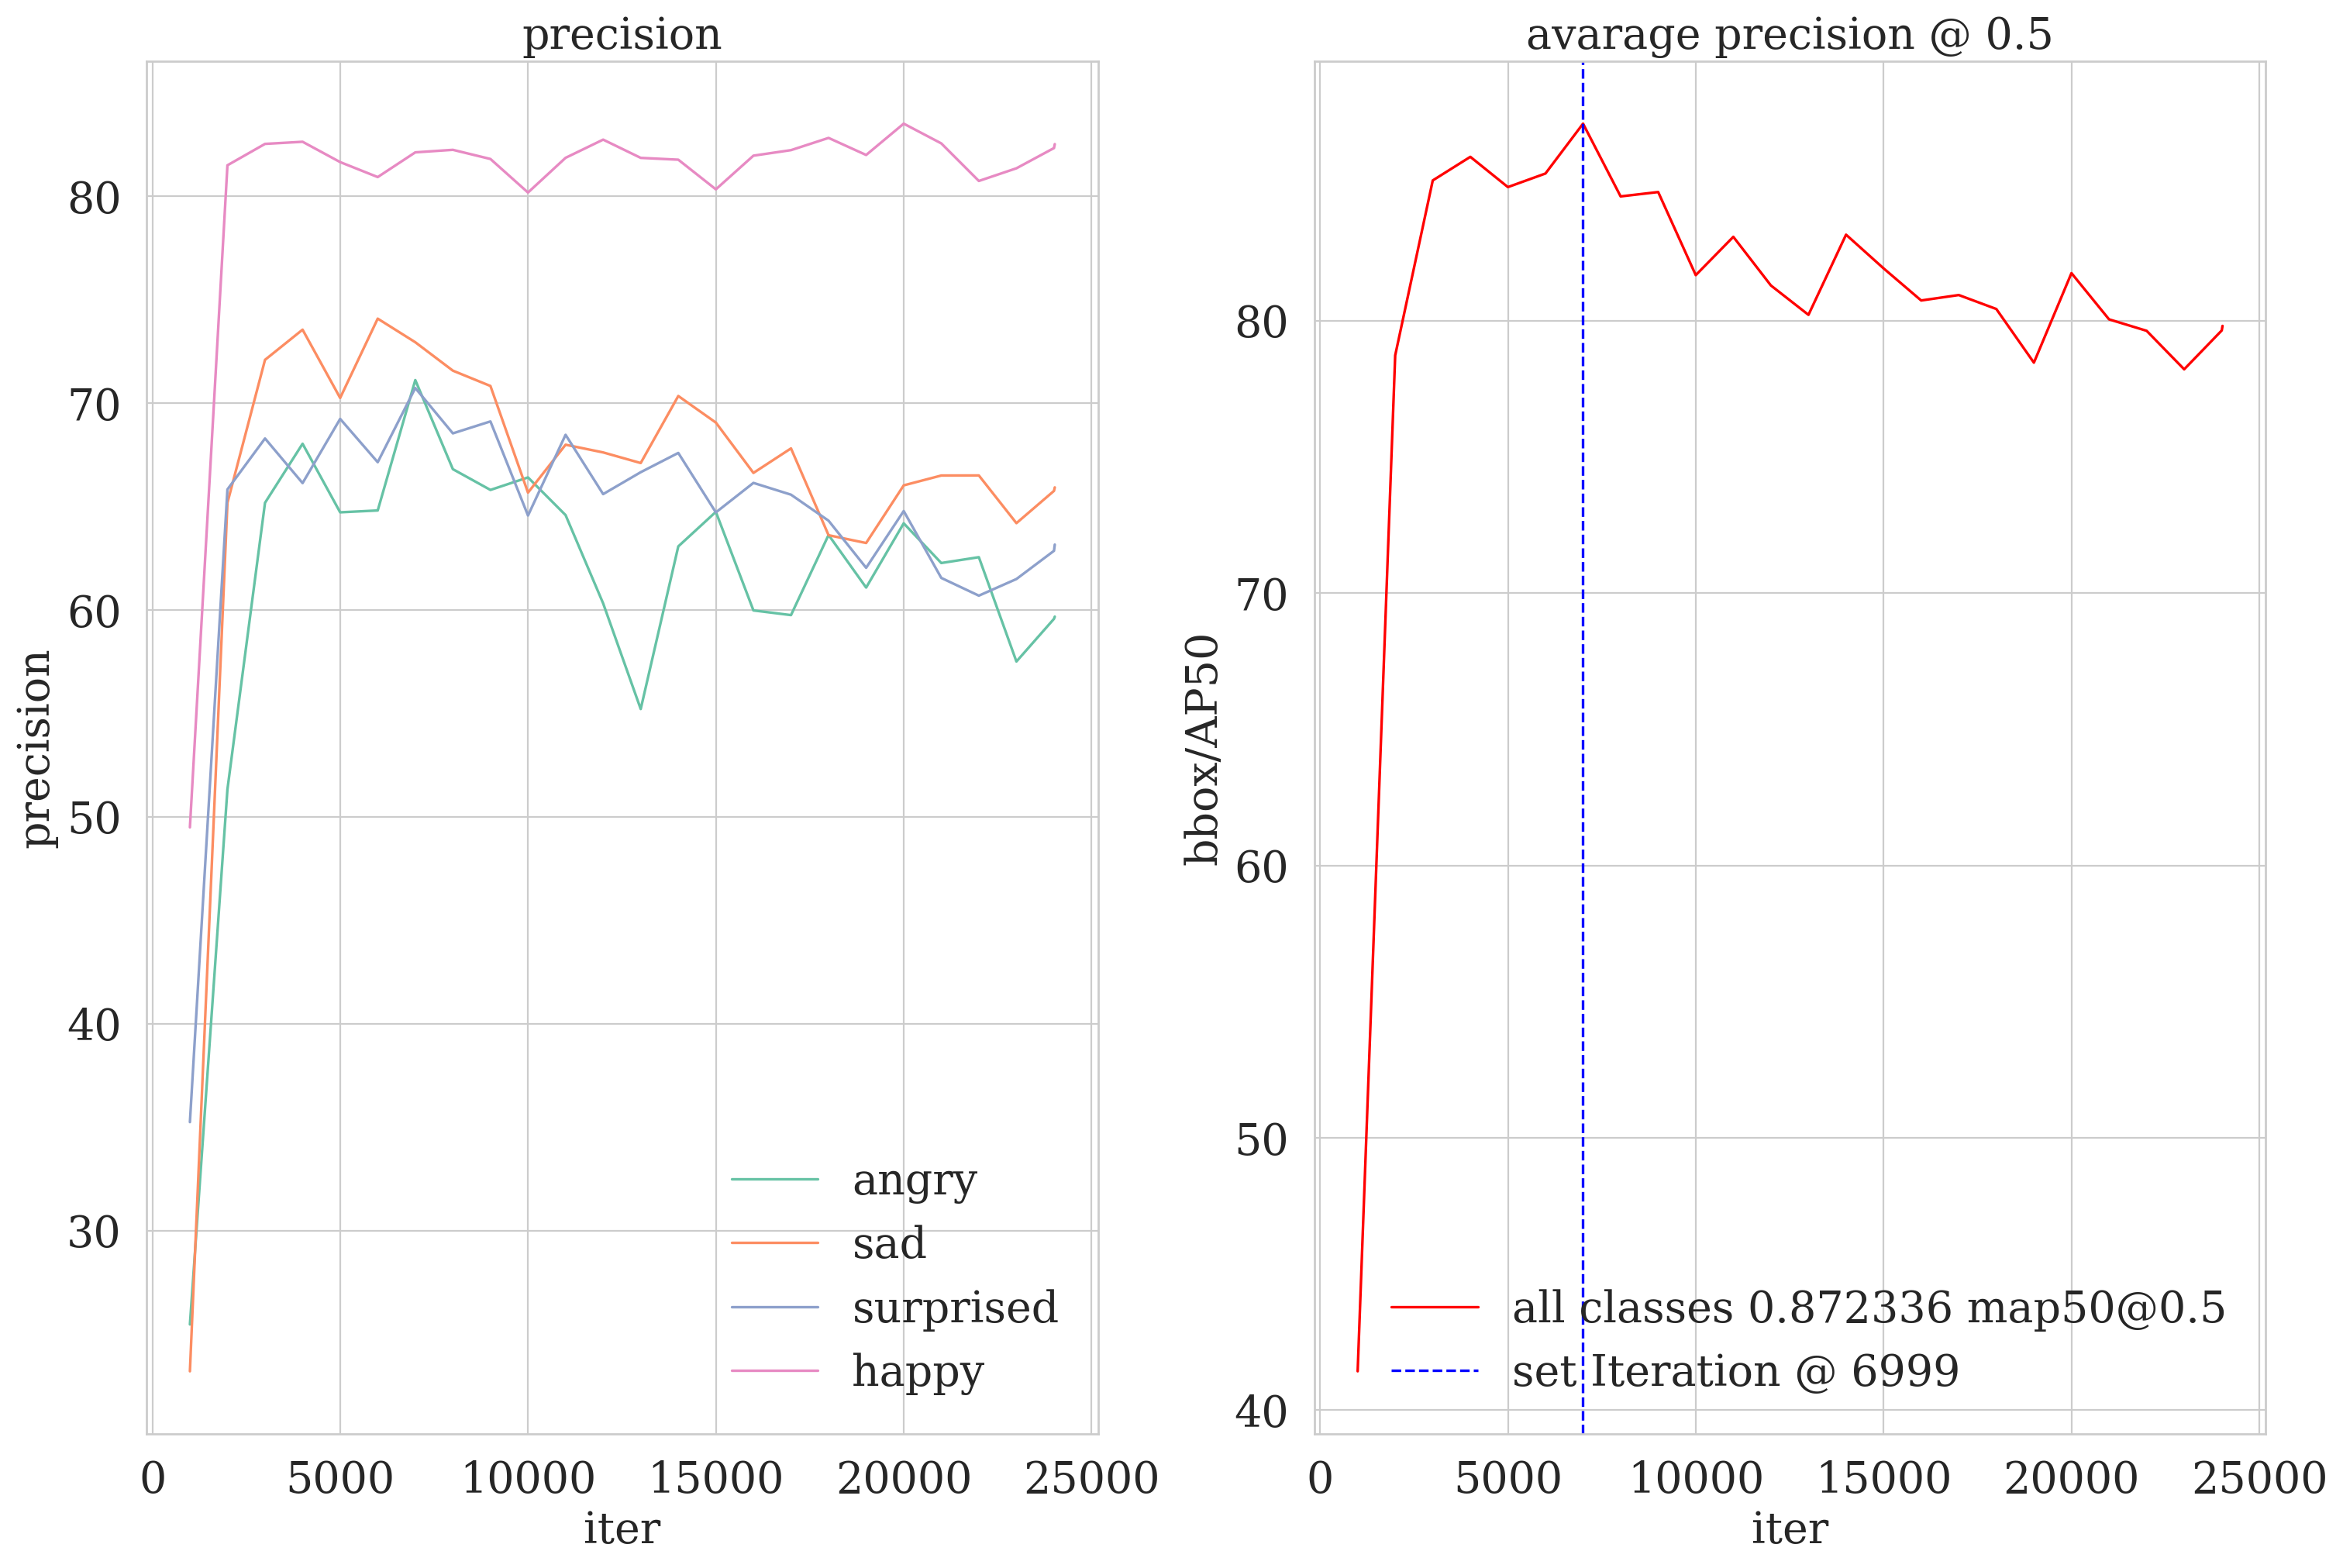

In [14]:
# ap 최대
valid_df_max = valid_df[valid_df['bbox/AP'] == valid_df['bbox/AP'].max()].index[0]
# valid_df.iloc[valid_df_max]

# 그래프 그리기
fig, ax = plt.subplots(1, 2, figsize=(15, 10))

v = valid_df.iloc[valid_df_max]['bbox/AP50']
# ap 그래프
for name in ['bbox/AP-angry','bbox/AP-sad','bbox/AP-surprised','bbox/AP-happy']:
    sns.lineplot(data=valid_df, x='iteration', y=name, legend='full', label=name.split('-')[1], ax=ax[0])

sns.lineplot(data=valid_df, x='iteration', y='bbox/AP50', legend='full',color='red', label=f'all classes {v/100:04f} map50@0.5',ax=ax[1]) # 색지정 : color='red'


ax[0].set_ylabel('precision')
ax[0].set_xlabel('iter')
ax[0].set_title('precision')

ax[1].set_xlabel('iter')
ax[1].axvline(x=6999, color='blue', linestyle='--',label='set Iteration @ 6999')
ax[1].legend()
ax[1].set_title('avarage precision @ 0.5');

fig.savefig('models/faster_rcnn_R_50_FPN_3x/metric_graphs/each_precision_ap.png', dpi=300)
